In [1]:
# Install Libraries
!pip install textblob
!pip install tweepy
!pip install pycountry
!pip install wordcloud
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 25.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 20.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 48.2 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681832 sha256=209c6afddbce7b7d53b4ca5484e762e9618d2e0da99f6f2441965d7dc12ae3ad
  Stored in directory: /home/ec2-user/.cache/pip/wheels/62/4a/9c/7a46699df9efb845aa116fae5e52d8690fc442fef6d32213f7


In [2]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/ec2-user/nltk_data...


True

# Step 2: Authentication for Twitter API

In [3]:
# Authentication
consumerKey = ""
consumerSecret = ""
accessToken = ""
accessTokenSecret = ""

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

# Step 3: Getting Tweets With Keyword or Hashtag

In [4]:
#Sentiment Analysis
def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = "ucm"
noOfTweet = 100

tweets = tweepy.Cursor(api.search_tweets, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    # print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')
 


Please enter keyword or hashtag to search:  ucm
Please enter how many tweets to analyze:  100


In [5]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  100
positive number:  15
negative number:  52
neutral number:  33


In [6]:
tweet_list[0:20]

,0
0,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...
1,HERMANO QUE IDA DE OLLA ES ESTA DIOS MIO TOP 3...
2,RT @AndresEHernnde1: En Villa Clara hoy defien...
3,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...
4,RT @peterjordan100: Geral falando bem de Guard...
5,RT @peterjordan100: Geral falando bem de Guard...
6,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...
7,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...
8,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...
9,"@GabyMeza8 Y hasta ahora, mi favorita del UCM ..."


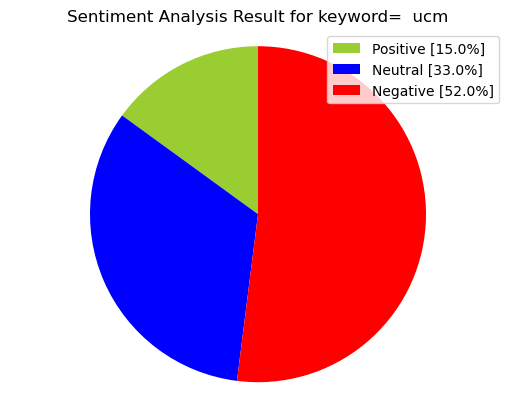

In [9]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [10]:
tweet_list.drop_duplicates(inplace = True)

# Extracting text values

In [11]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...
1,HERMANO QUE IDA DE OLLA ES ESTA DIOS MIO TOP 3...,HERMANO QUE IDA DE OLLA ES ESTA DIOS MIO TOP 3...
2,RT @AndresEHernnde1: En Villa Clara hoy defien...,RT @AndresEHernnde1: En Villa Clara hoy defien...
4,RT @peterjordan100: Geral falando bem de Guard...,RT @peterjordan100: Geral falando bem de Guard...
9,"@GabyMeza8 Y hasta ahora, mi favorita del UCM ...","@GabyMeza8 Y hasta ahora, mi favorita del UCM ..."
10,por mucho la mejor película que ha hecho Mariv...,por mucho la mejor película que ha hecho Mariv...
11,"Sintiéndome un poco calabaza espachurrada, esp...","Sintiéndome un poco calabaza espachurrada, esp..."
12,"RT @Multiverso_GK: Y así cierra, una de las me...","RT @Multiverso_GK: Y así cierra, una de las me..."
14,Porque los infuencers no pueden calificar #Gua...,Porque los infuencers no pueden calificar #Gua...
15,🫠🫠🫠🫠🫠🫠🫠🫠🫠🫠🫠🫠🫠 El mejor prólogo del UCM https:/...,🫠🫠🫠🫠🫠🫠🫠🫠🫠🫠🫠🫠🫠 El mejor prólogo del UCM https:/...


In [13]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...,en honor a star wars por el maythe4thbew...
1,HERMANO QUE IDA DE OLLA ES ESTA DIOS MIO TOP 3...,hermano que ida de olla es esta dios mio top 3...
2,RT @AndresEHernnde1: En Villa Clara hoy defien...,en villa clara hoy defiende su tesis doctoral...
4,RT @peterjordan100: Geral falando bem de Guard...,geral falando bem de guardi es da gal xia ge...
9,"@GabyMeza8 Y hasta ahora, mi favorita del UCM ...",y hasta ahora mi favorita del ucm es guardi...
10,por mucho la mejor película que ha hecho Mariv...,por mucho la mejor pel cula que ha hecho mariv...
11,"Sintiéndome un poco calabaza espachurrada, esp...",sinti ndome un poco calabaza espachurrada esp...
12,"RT @Multiverso_GK: Y así cierra, una de las me...",y as cierra una de las mejores trilog as de...
14,Porque los infuencers no pueden calificar #Gua...,porque los infuencers no pueden calificar gua...
15,🫠🫠🫠🫠🫠🫠🫠🫠🫠🫠🫠🫠🫠 El mejor prólogo del UCM https:/...,el mejor pr logo del ucm


In [14]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

/tmp/ipykernel_7432/4219357815.py:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, row in tw_list['text'].iteritems():


,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...,en honor a star wars por el maythe4thbew...,0.0,0.066667,negative,0.165,0.688,0.147,-0.1027
1,HERMANO QUE IDA DE OLLA ES ESTA DIOS MIO TOP 3...,hermano que ida de olla es esta dios mio top 3...,0.5,0.500000,positive,0.101,0.734,0.165,0.1027
2,RT @AndresEHernnde1: En Villa Clara hoy defien...,en villa clara hoy defiende su tesis doctoral...,0.0,0.000000,neutral,0.000,1.000,0.000,0.0000
4,RT @peterjordan100: Geral falando bem de Guard...,geral falando bem de guardi es da gal xia ge...,0.0,0.000000,neutral,0.000,1.000,0.000,0.0000
9,"@GabyMeza8 Y hasta ahora, mi favorita del UCM ...",y hasta ahora mi favorita del ucm es guardi...,0.0,0.000000,neutral,0.000,1.000,0.000,0.0000
10,por mucho la mejor película que ha hecho Mariv...,por mucho la mejor pel cula que ha hecho mariv...,0.0,0.000000,positive,0.000,0.876,0.124,0.3400
11,"Sintiéndome un poco calabaza espachurrada, esp...",sinti ndome un poco calabaza espachurrada esp...,0.0,0.000000,neutral,0.000,1.000,0.000,0.0000
12,"RT @Multiverso_GK: Y así cierra, una de las me...",y as cierra una de las mejores trilog as de...,0.0,0.000000,neutral,0.000,1.000,0.000,0.0000
14,Porque los infuencers no pueden calificar #Gua...,porque los infuencers no pueden calificar gua...,0.5,0.500000,negative,0.210,0.619,0.171,-0.2023
15,🫠🫠🫠🫠🫠🫠🫠🫠🫠🫠🫠🫠🫠 El mejor prólogo del UCM https:/...,el mejor pr logo del ucm,0.0,0.000000,neutral,0.000,1.000,0.000,0.0000


In [15]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [16]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [17]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,20,58.82
negative,9,26.47
positive,5,14.71


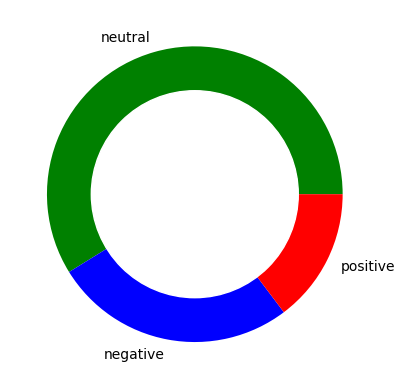

In [18]:
# create data for Pie Chart
pc = count_values_in_column(tw_list,"sentiment")
names= pc.index
size=pc["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [19]:
#Function to Create Wordcloud

def create_wordcloud(text):
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white", width=600, height=400,               
                  max_words=300,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    
    plt.imshow(wc)
    plt.show()



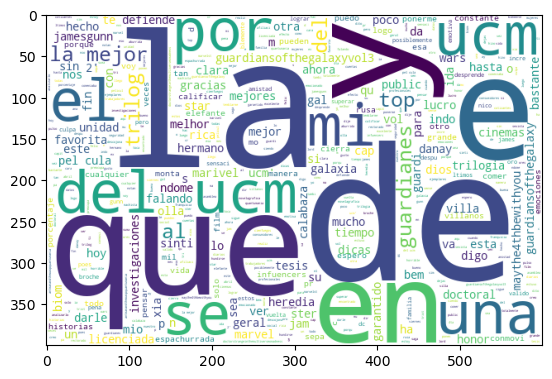

In [20]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

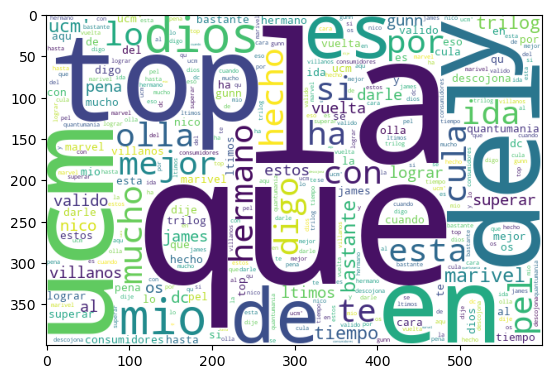

In [21]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

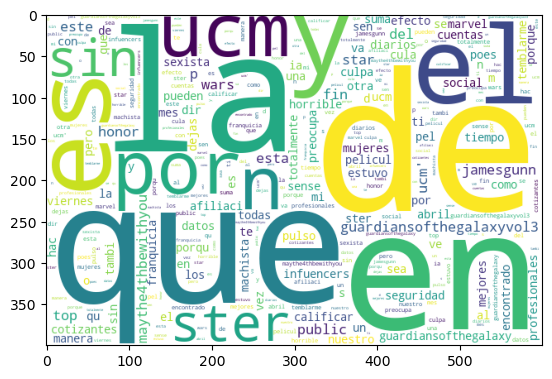

In [22]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

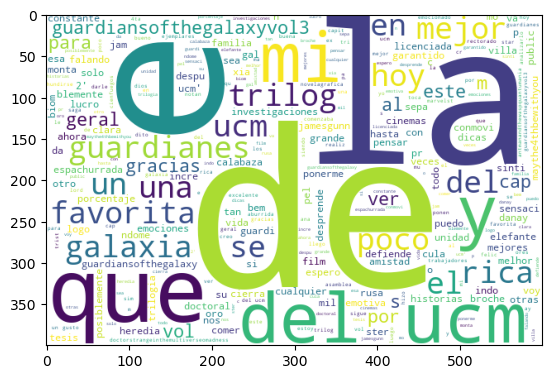

In [23]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)